In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import ipyvolume as ipv
from scipy.interpolate import griddata
from matplotlib import cm
import bqplot.scales

In [2]:
from evaluation.validator import Validator



paths from config ['C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\util', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\data_utils\\data_loaders', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\models', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\trainers', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\data_utils', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments', 'C:\\Users\\tkachenko\\Anaconda3\\python38.zip', 'C:\\Users\\tkachenko\\Anaconda3\\DLLs', 'C:\\Users\\tkachenko\\Anaconda3\\lib', 'C:\\Users\\tkachenko\\Anaconda3', '', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\tkachenko\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tka

In [3]:
'''with open('test/Colon_MedianFilter/cp-0000/compare_all_thresholds.csv', newline='') as csvfile:
    report_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    print(next(report_reader))
    next(report_reader)
    data = []
    for row in report_reader:
        data.append(row)
        
    thresholds = 
        
print(data)'''

validator = Validator()
best_checkpoint, best_threshold, thresholds, means, best_sens, best_spec = validator.find_best_checkpoint('test\\Colon_MedianFilter\\')
print(best_threshold)
print(means)
print(best_sens, best_spec)

def get_X_Y_Z_original(medians):
    X_raw = best_threshold * np.ones(medians.shape[0])
    Y_raw = medians
    Z_raw = means[0] * np.ones(medians.shape[0])
    
    return X_raw, Y_raw, Z_raw

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 271.05it/s]

test\Colon_MedianFilter\cp-0000\
['test\\Colon_MedianFilter\\cp-0000\\']
test\Colon_MedianFilter\cp-0000\
3 4 2
Sensitivities [0.87873036 0.87873036 0.87135816 0.87135816 0.86631006 0.86631006
 0.86259586 0.86259586 0.86024386 0.86024386 0.85787314 0.85787314
 0.8556536  0.8556536  0.85427773 0.85427773 0.8527474  0.8527474
 0.85171926 0.85171926 0.85171926 0.8476076  0.8442237  0.84102273
 0.838271   0.8363349  0.8348924  0.8330486  0.83124155 0.8293188
 0.82825094 0.8273132  0.825973   0.8250876  0.8238974  0.8228542
 0.8215496  0.82070017 0.81998736 0.81952256]
Specificities [0.7882436  0.7882436  0.80014783 0.80014783 0.80705154 0.80705154
 0.81192195 0.81192195 0.8156836  0.8156836  0.81866086 0.81866086
 0.82124174 0.82124174 0.82347244 0.82347244 0.8254377  0.8254377
 0.8271835  0.8271835  0.8271835  0.8337933  0.83758503 0.84122735
 0.84434307 0.8467693  0.8484867  0.8502629  0.8519072  0.8532829
 0.85434693 0.8555288  0.85670745 0.85776925 0.85855997 0.85944337
 0.86024296 0.8

In [4]:
with open('test/Colon_MedianFilter/cp-0000/compare_all_thresholds_filtered.csv', newline='') as csvfile:
    report_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    print(next(report_reader))
    next(report_reader)
    data = []
    for row in report_reader:
        data.append(row)
        
    data = np.array(data[10:])
    #print(data)
    
    thresholds = data[:, 2].astype(float)
    medians = data[:, -1].astype(float)
    sens = data[:, 3].astype(float)
    spec = data[:, 4].astype(float)
    
    X_o, Y_o, Z_o = get_X_Y_Z_original(np.unique(medians))
    print(X_o, Y_o, Z_o)
    
    xv = np.linspace(min(thresholds), max(thresholds), 100);
    yv = np.linspace(min(medians), max(medians), 100);
    [X,Y] = np.meshgrid(xv, yv)
    
    print('---------------X------------------')
    print(X)
    print('---------------Y------------------')
    print(Y)
    Z_sens = griddata((thresholds,medians),sens,(X,Y), method='linear')
    Z_spec = griddata((thresholds,medians),spec,(X,Y), method='linear')
    Z_baseline = griddata((thresholds,medians),means[0] * np.ones(sens.shape[0]),(X,Y), method='linear')
    print('---------------Z sens------------------')
    print(Z_sens)
    
    #X, Y = np.meshgrid(thresholds, medians)
    #print(X.shape)
    #print(sens)
    #sens, spec = np.meshgrid(sens, spec)
    #spec, _ = np.meshgrid(spec, spec)
    #print(sens)
    
    
    #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # surf = ax.plot_surface(X, Y, Z_spec, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    #ipv.scatter(thresholds, medians, sens)
    
    '''scales = {
        'z': bqplot.scales.LinearScale(min=0, max=1),
    }'''
    print(np.max(X), np.min(X), np.max(Y), np.min(Y), np.max(Z_spec), np.min(Z_spec), np.max(Z_sens), np.min(Z_sens))
    
    
    
    ipv.xlim(xmin=np.min(X), xmax=np.max(X))
    ipv.ylim(ymin=np.min(Y), ymax=np.max(Y))
    ipv.zlim(zmin=min(np.min(Z_spec), np.min(Z_sens)), zmax=max(np.max(Z_spec), np.max(Z_sens)))
    #ipv.plot(X_o, Y_o, Z_o, color='green')
    ipv.plot_surface(X, Y, Z_spec, color='blue')
    ipv.plot_surface(X, Y, Z_sens)
    ipv.plot_surface(X, Y, Z_baseline, color='green')
    ipv.show()
    ipv.clear()
    

['Time', 'Checkpoint', 'Threshold', 'Sensitivity_mean', 'Specificity_mean', 'median']
[0.0024 0.0024 0.0024 0.0024] [ 5. 10. 15. 25.] [0.84112501 0.84112501 0.84112501 0.84112501]
---------------X------------------
[[0.0001 0.0002 0.0003 ... 0.0098 0.0099 0.01  ]
 [0.0001 0.0002 0.0003 ... 0.0098 0.0099 0.01  ]
 [0.0001 0.0002 0.0003 ... 0.0098 0.0099 0.01  ]
 ...
 [0.0001 0.0002 0.0003 ... 0.0098 0.0099 0.01  ]
 [0.0001 0.0002 0.0003 ... 0.0098 0.0099 0.01  ]
 [0.0001 0.0002 0.0003 ... 0.0098 0.0099 0.01  ]]
---------------Y------------------
[[ 5.         5.         5.        ...  5.         5.         5.       ]
 [ 5.2020202  5.2020202  5.2020202 ...  5.2020202  5.2020202  5.2020202]
 [ 5.4040404  5.4040404  5.4040404 ...  5.4040404  5.4040404  5.4040404]
 ...
 [24.5959596 24.5959596 24.5959596 ... 24.5959596 24.5959596 24.5959596]
 [24.7979798 24.7979798 24.7979798 ... 24.7979798 24.7979798 24.7979798]
 [25.        25.        25.        ... 25.        25.        25.       ]]
------

In [41]:
condition = (sens > means[0]) & (spec > means[0])
sens_more = sens[condition] 
spec_more = spec[condition] 
thresholds_more = thresholds[condition]
medians_more = medians[condition]

summ_ = sens_more + spec_more - (2 * means[0])
summ_i = np.argmax(summ_)
print('With best improvement',sens_more[summ_i], spec_more[summ_i], thresholds_more[summ_i], medians_more[summ_i], summ_[summ_i])


for se, sp, th, med, s in zip(sens_more, spec_more, thresholds_more, medians_more, summ_):
    print(se, sp, th, med, s, np.abs(se-sp))
    
0.841
0.0024


With best improvement 0.8415450229492837 0.8893906080589186 0.0062 15.0 0.04868560812001865
0.8596808791629295 0.8467817036928228 0.001 10.0 0.02421255996756866 0.01289917547010666
0.8561046125810033 0.8540924535788976 0.0015 10.0 0.027947043271717487 0.002012159002105718
0.8545031033875773 0.8583157846189119 0.0019 10.0 0.030568865118305588 0.0038126812313346026
0.8523244335407145 0.8623140169321298 0.0024 10.0 0.03238842758466065 0.009989583391415313
0.8501957745242574 0.8658153623327535 0.0029 10.0 0.033761113968827416 0.015619587808496038
0.8483486081786535 0.8685036125623284 0.0034 10.0 0.03460219785279839 0.0201550043836749
0.8471878171301428 0.8702269715969341 0.0038 10.0 0.035164765838893164 0.02303915446679128
0.8460282936944539 0.8721980522666096 0.0043 10.0 0.03597632307287979 0.026169758572155755
0.8524675661352621 0.8439186732989948 0.0015 5.0 0.014136216546073221 0.008548892836267252
0.8485867843042465 0.8478683899608125 0.0019 5.0 0.014205151376875502 0.00071839434343401

In [38]:
print(sens.shape)

for m in np.unique(medians):
    condition = medians == m
    sens_c = sens[condition] 
    spec_c = spec[condition] 
    thresholds_c = thresholds[condition]
    medians_c = medians[condition]
    
    diff = np.abs(sens_c - spec_c)
    diff_i = np.argmin(diff)
    print('Best threshold with harmony', sens_c[diff_i], 
          spec_c[diff_i], thresholds_c[diff_i], medians_c[diff_i], diff[diff_i])


(236,)
Best threshold with harmony 0.8485867843042465 0.8478683899608125 0.0019 5.0 0.0007183943434340145
Best threshold with harmony 0.8561046125810033 0.8540924535788976 0.0015 10.0 0.002012159002105718
Best threshold with harmony 0.8576899606868139 0.8568696872571042 0.0009 15.0 0.0008202734297096947
Best threshold with harmony 0.8521381688250045 0.8549713280097594 0.0004 25.0 0.0028331591847549076


In [ ]:
#!/usr/bin/python3

import sys

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy
from numpy.random import randn
from scipy import array, newaxis


# ======
## data:

DATA = array([
    [-0.807237702464, 0.904373229492, 111.428744443],
    [-0.802470821517, 0.832159465335, 98.572957317],
    [-0.801052795982, 0.744231916692, 86.485869328],
    [-0.802505546206, 0.642324228721, 75.279804677],
    [-0.804158144115, 0.52882485495, 65.112895758],
    [-0.806418040943, 0.405733109371, 56.1627277595],
    [-0.808515314192, 0.275100227689, 48.508994388],
    [-0.809879521648, 0.139140394575, 42.1027499025],
    [-0.810645106092, -7.48279012695e-06, 36.8668106345],
    [-0.810676720161, -0.139773175337, 32.714580273],
    [-0.811308686707, -0.277276065449, 29.5977405865],
    [-0.812331692291, -0.40975978382, 27.6210856615],
    [-0.816075037319, -0.535615685086, 27.2420699235],
    [-0.823691366944, -0.654350489595, 29.1823292975],
    [-0.836688691603, -0.765630198427, 34.2275056775],
    [-0.854984518665, -0.86845932028, 43.029581434],
    [-0.879261949054, -0.961799684483, 55.9594146815],
    [-0.740499820944, 0.901631050387, 97.0261463995],
    [-0.735011699497, 0.82881933383, 84.971061395],
    [-0.733021568161, 0.740454485354, 73.733621269],
    [-0.732821755233, 0.638770044767, 63.3815970475],
    [-0.733876941678, 0.525818698874, 54.0655910105],
    [-0.735055978521, 0.403303715698, 45.90859502],
    [-0.736448900325, 0.273425879041, 38.935709456],
    [-0.737556181137, 0.13826504904, 33.096106049],
    [-0.738278724065, -9.73058423274e-06, 28.359664343],
    [-0.738507612286, -0.138781586244, 24.627237837],
    [-0.738539663773, -0.275090412979, 21.857410904],
    [-0.739099040189, -0.406068448513, 20.1110519655],
    [-0.741152200369, -0.529726022182, 19.7019157715],
])

Xs = DATA[:,0]
Ys = DATA[:,1]
Zs = DATA[:,2]


# ======
## plot:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))

fig.tight_layout()

plt.show() # or:

In [2]:
import numpy as np

predictions = np.load('C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\test\\Colon_MedianFilter\\cp-0000\\predictions_whole.npy', allow_pickle=True)

(307200, 1)


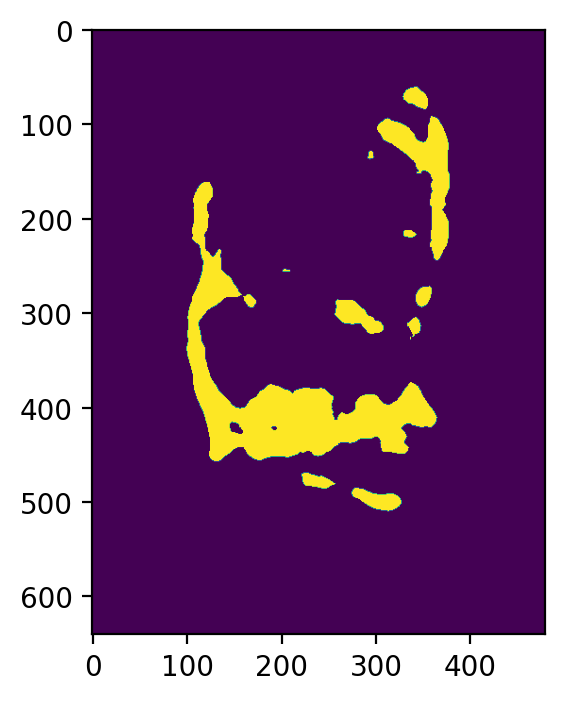

In [16]:
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
print(predictions[0]['predictions'].shape)
plt.figure(dpi=200)
#plt.imshow(np.reshape(predictions[0]['predictions'], (640, 480)), vmin=0, vmax=1)
#plt.imshow(np.where(np.reshape(predictions[0]['predictions'], (640, 480)) > 0.5, 1, 0), vmin=0, vmax=1)
plt.imshow(median_filter(np.where(np.reshape(predictions[0]['predictions'], (640, 480)) > 0.5, 1, 0), size=25), vmin=0, vmax=1)

In [8]:
import numpy as np
import os
#import cv2
import matplotlib.pyplot as plt 
import imageio as iio

In [18]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

255


<ipython-input-18-7f92b3a0e387>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-18-7f92b3a0e387>:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


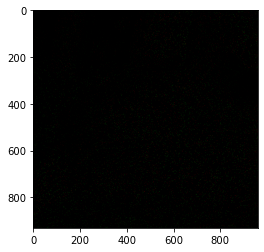

array([  0,   2,   4,   6,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [19]:
image = np.array(iio.imread("C:\\Users\\tkachenko\\Desktop\\HSI\\paper post-processing\\cat.jpg"))
print(np.max(image))
noisy_image = noisy("s&p", image)

plt.imshow(noisy_image-image)
plt.show()
np.unique(noisy_image-image)